In [ ]:
import matplotlib.pyplot as plt
from gan_synthesis.visualization.viz_utils import overlay_mask
from gan_synthesis.preprocessing.transforms import crop_tumor_center, find_center

In [39]:
image, seg = crop_tumor_center(143)

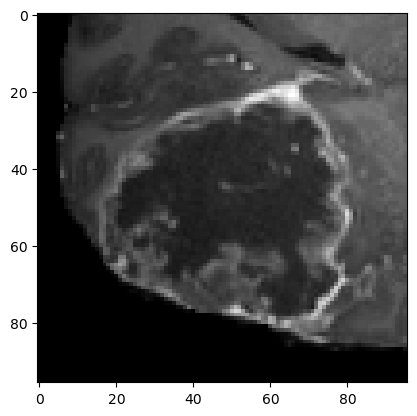

In [42]:
plt.imshow(image, cmap="gray")

In [ ]:
def add_noise(cropped_image):
    x, y = find_center(cropped_image)
    


SyntaxError: incomplete input (1168429716.py, line 2)

In [2]:
ds

NameError: name 'ds' is not defined

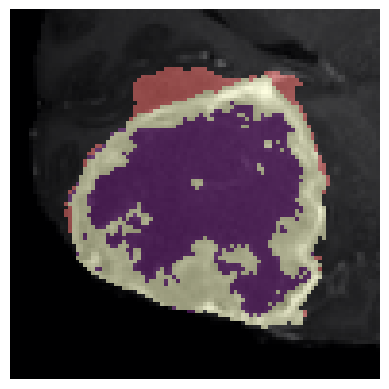

In [40]:
overlay_mask(image, seg)